In [58]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

In [59]:
df = pd.read_csv(r'C:\Users\Lee seohyun\Desktop\결정트리, 앙상블\datatree\신용카드사기검출\creditcard.csv')

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.Class.value_counts()
# 0 : 정상거래
# 1 : 비정상 거래 (카드 도용, 사기,,,)

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#평가지표
#score 정확도 (=accuracy) --> 정확하지 않다
#

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [61]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:.3f}, 정밀도:{1:.3f}, 재현율:{2:.3f}, F1:{3:.3f}, AUC:{4:.3f}'.format(accuracy, precision, recall, f1, auc))


<AxesSubplot:ylabel='Frequency'>

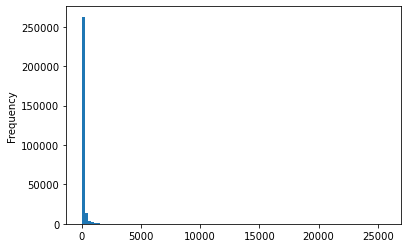

In [62]:
# Amount 컬럼 시각화
#df.Amount.plot()
df.Amount.plot(kind = 'hist', bins = 100)
#import seaborn as sns
#sns.displot(df.Amount)

In [ ]:
#### 전처리

<AxesSubplot:>

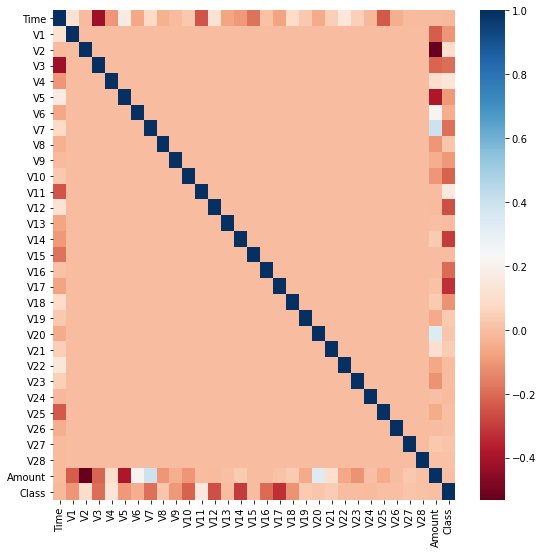

In [63]:
#이상치 제거
import seaborn as sns
plt.figure(figsize = (9,9))
corr = df.corr()
sns.heatmap(corr,cmap='RdBu')
#상관관계확인
#상관관계가 가장 높은 V17 컬럼을 선택해서 아웃라이어 제거

In [64]:
#아웃라이어 제거 함수(1인 애들 대상)
def get_outlier(df, column, weight):
    fraud = df[df.Class == 1][column]
    # 25%, 75% 분위값을 계산
    q25 = fraud.quantile(0.25)
    q75 = fraud.quantile(0.75)
    iqr = q75 - q25
    lowest = q25 - iqr*weight
    highest = q75 + iqr*weight
    return fraud[(fraud < lowest) | (fraud > highest)].index

#25분위와 75분위의 차이(iqr)
#iqr값을 weight와 곱한 만큼 벗어나는 애들 삭제

In [65]:
#함수 잘 돌아가는지 확인 --> 전처리 함수에 추가
get_outlier(df,'V17',1)

Int64Index([42473, 42528, 42609, 42635, 42674, 42856, 150665], dtype='int64')

In [ ]:
#df.describe() -> 아웃라이어 제거

In [66]:
from sklearn.preprocessing import StandardScaler
def get_preprocessed_df(df):
    # 전처리 함수
    df_copy = df.copy()
    # 1. Time 컬럼 삭제
    df_copy.drop('Time', axis = 1, inplace = True)
    # 2. Amount 컬럼은 standardScaler 적용
    sc = StandardScaler()
    df_copy['Amount'] = sc.fit_transform(df_copy.Amount.values.reshape(-1, 1))
    # 3. V17의 outlier를 제거
    out_idx = get_outlier(df_copy, 'V17', 1)
    df_copy.drop(out_idx, axis = 0, inplace = True)
    return df_copy



In [67]:
from sklearn.model_selection import train_test_split
def get_train_test_dataset(df):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.drop('Class', axis = 1)
    y_target = df_copy['Class']
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target)
    return X_train, X_test, y_train, y_test


In [68]:
X_train , X_test , y_train, y_test = get_train_test_dataset(df)

In [69]:
#간단한 모델 생성 및 실습
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=2000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [31]:
#XGBoost 모델 실습 
#!pip install xgboost

In [70]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False,eval_metric = 'logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [73]:
#평가 지표 출력
#print('[LogisticRegression]\n'.get_clf_eval(y_test, lr_clf.predict(X_test)))
get_clf_eval(y_test, lr_clf.predict(X_test))     

오차 행렬
[[71058    17]
 [   58    67]]
정확도:0.999, 정밀도:0.798, 재현율:0.536, F1:0.641, AUC:0.768


In [74]:
#print('[XGBoost]\n'.get_clf_eval(y_test, xgb.predict(X_test)))  
get_clf_eval(y_test, xgb.predict(X_test))

오차 행렬
[[71070     5]
 [   35    90]]
정확도:0.999, 정밀도:0.947, 재현율:0.720, F1:0.818, AUC:0.860


In [49]:
#샘플링 for 불균형 데이터 처리
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#2번 샘플링 

In [51]:
!pip install imbalanced-learn

In [77]:
import imblearn
from imblearn.over_sampling import SMOTE

In [79]:
imblearn.__version__

'0.8.0'

In [80]:
#train 데이터 에서만 오버샘플링
sm = SMOTE()
X_train_over, y_train_over = sm.fit_resample(X_train , y_train)

In [81]:
len(X_train)

213600

In [82]:
len(X_train_over)

426480

In [83]:
y_train.value_counts()

0    213240
1       360
Name: Class, dtype: int64

In [85]:
y_train_over.value_counts()

0    213240
1    213240
Name: Class, dtype: int64

In [86]:
#XGBoost 실습
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False,eval_metric = 'logloss')
xgb.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [87]:
get_clf_eval(y_test, xgb.predict(X_test))

오차 행렬
[[71037    38]
 [   25   100]]
정확도:0.999, 정밀도:0.725, 재현율:0.800, F1:0.760, AUC:0.900
